<a href="https://colab.research.google.com/github/Alok180804/LightCurveAnalysis/blob/main/RRLyrae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lightkurve astropy pandas matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.8 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=ff27fbd2d2a08b990a58f48950ba85b5705c5e6831c47b4019e4a177c3fc5f92
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5459f0333c9b
  Created wheel for memoization: filename=memoization-0.4.0-py3-none

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

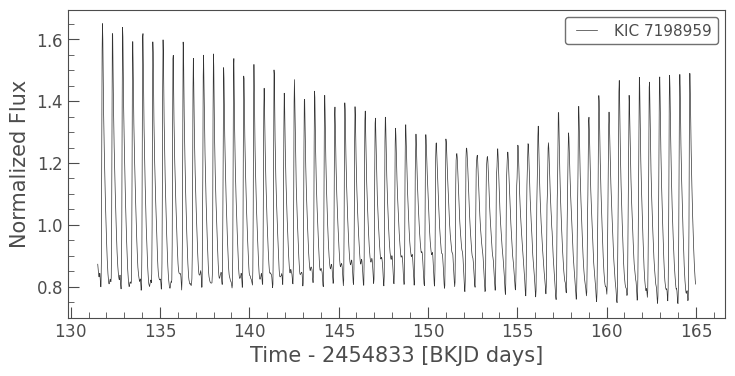

In [2]:
import lightkurve as lk

# Step 1: Download RR Lyrae data from Kepler
search_result = lk.search_lightcurve("KIC 7198959", mission="Kepler")
lc = search_result.download()

# Step 2: Preprocess the data
lc_clean = lc.remove_nans().normalize().flatten(window_length=401)

# Step 3: Remove outliers
lc_clipped = lc_clean.remove_outliers(sigma=5)

# Step 4: Plot cleaned light curve
lc_clipped.plot(title="RR Lyrae Cleaned Light Curve")

Best period: 0.5666267250026011 d


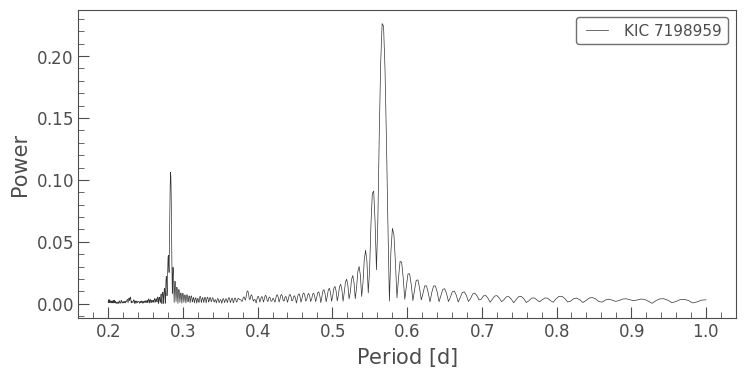

In [3]:
periodogram = lc_clipped.to_periodogram(method='lombscargle', minimum_period=0.2, maximum_period=1)
periodogram.plot()

# Get best period
best_period = periodogram.period_at_max_power
print("Best period:", best_period)

<ipython-input-4-c5cc7fcd5fc6>:2: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_folded_bin = lc_folded.bin(binsize=100)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

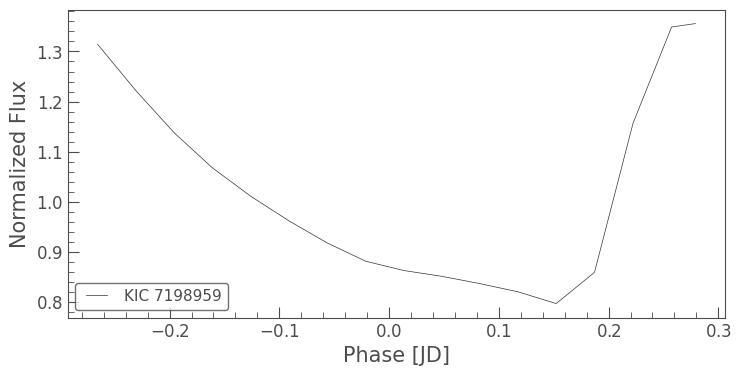

In [4]:
lc_folded = lc_clipped.fold(period=best_period)
lc_folded_bin = lc_folded.bin(binsize=100)
lc_folded_bin.plot(title="Folded Light Curve of RR Lyrae")